In [1]:
from flux.datasets.vision.celeba import CelebA
import tensorflow as tf

tf.enable_eager_execution()


[Flux] Initializing...


In [2]:
data = CelebA(force_build=True)

[Flux] Retrieving CelebA data
[Flux] Downloading img_align_celeba.zip


44052it [53:54, 13.62it/s]


[Flux] Decompressing: /home/karen/.flux/work/img_align_celeba.zip
[Flux] Decompressed img_align_celeba.zipto /home/karen/.flux/work/img_align_celeba
[Flux] Completed img_align_celeba.zip
[Flux] Downloading list_attr_celeba.txt


816it [00:45, 17.86it/s]


[Flux] Decompressed list_attr_celeba.txtto /home/karen/.flux/work/list_attr_celeba.txt
[Flux] Completed list_attr_celeba.txt
[Flux] Extracting CelebA data...
[Flux] Extracting CelebA labels first


  0%|          | 137/162079 [00:00<01:58, 1362.50it/s]

[Flux] Building train dataset...


  1%|          | 136/20259 [00:00<00:14, 1354.23it/s]

[Flux] Building val dataset...


100%|██████████| 20259/20259 [00:14<00:00, 1406.69it/s]


[Flux] Built Complete


Bags_Under_Eyes , Bangs , Blurry , Goatee , Oval_Face , Pointy_Nose , Smiling , Young


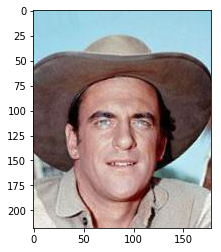

Attractive , Heavy_Makeup , Narrow_Eyes , Oval_Face , Sideburns , Wearing_Lipstick , Wearing_Necktie


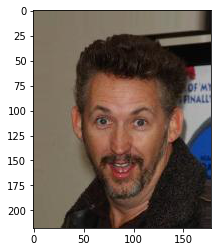

Bags_Under_Eyes , Blurry , Double_Chin , Receding_Hairline , Sideburns , Wearing_Necktie


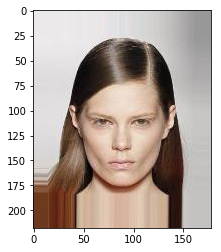

Bags_Under_Eyes , Blurry , Eyeglasses , No_Beard , Rosy_Cheeks , Wavy_Hair


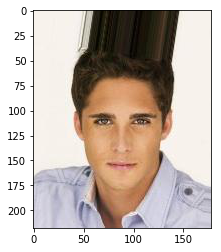

Big_Lips , Blurry , Mouth_Slightly_Open , Narrow_Eyes , Pale_Skin , Sideburns , Straight_Hair , Wearing_Hat


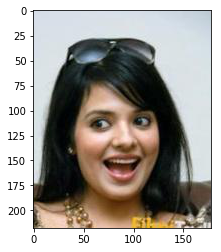

In [4]:
import matplotlib.pyplot as plt
import numpy as np
train_db = data.train_db.shuffle(
    buffer_size=3000).repeat().batch(1)
train_iterator = tf.contrib.eager.Iterator(train_db)
d = data.idx2attr
# Train the model
for iteration in range(5):
    label, img = next(train_iterator)
    im = np.squeeze(img.numpy())
    label = label.numpy()
    label = np.squeeze(np.where(label==1.)[1])
    print(" , ".join([d[i] for i in label]))
    plt.imshow(im)
    plt.show()
    
